HEIGHT: 720
WIDTH: 1280
CHANNELS: 3


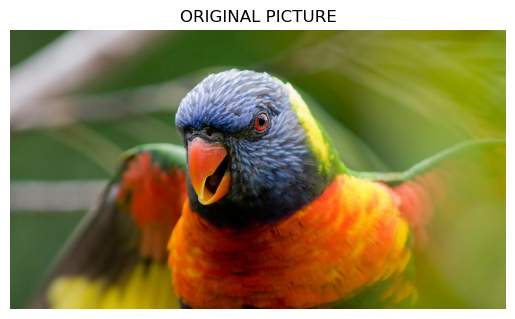

In [10]:
import cv2 as cv
import imutils
import sys
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(cv.samples.findFile("IMAGES/parrot.png"))

if img is None:
    sys.exit("Impossibile leggere l'immagine.")
    
height, width, n_ch = img.shape
print(f'HEIGHT: {height}\nWIDTH: {width}\nCHANNELS: {n_ch}')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('ORIGINAL PICTURE')
plt.axis('off')
plt.show()

### Histogram Computation

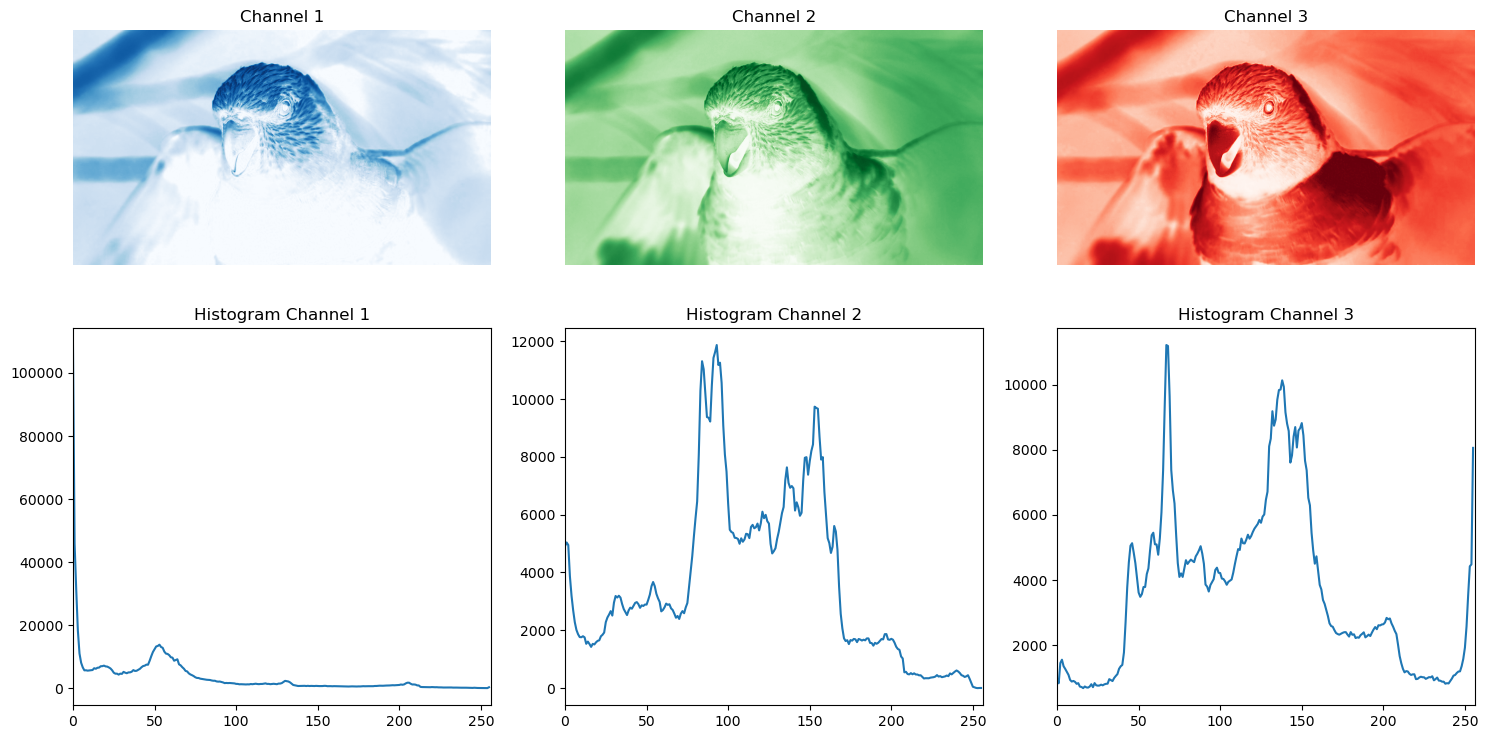

In [11]:
#split the image in different channels
chans = cv.split(img)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
colors = ["Blues", "Greens", "Reds"]
for i, (ch, col) in enumerate(zip(chans, colors)):
    #Visualize each channel separately
    ax = axes[0, i]
    ax.imshow(ch, cmap=col)
    ax.set_title(f'Channel {i + 1}')
    ax.axis('off')

    # Compute the histogram for each channel
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])

    # Display the histogram under the corresponding image
    ax = axes[1, i]
    ax.plot(hist)
    ax.set_title(f'Histogram Channel {i+1}')
    ax.set_xlim([0, 256])
    
plt.tight_layout()
plt.show()

### Contrast Enhancement

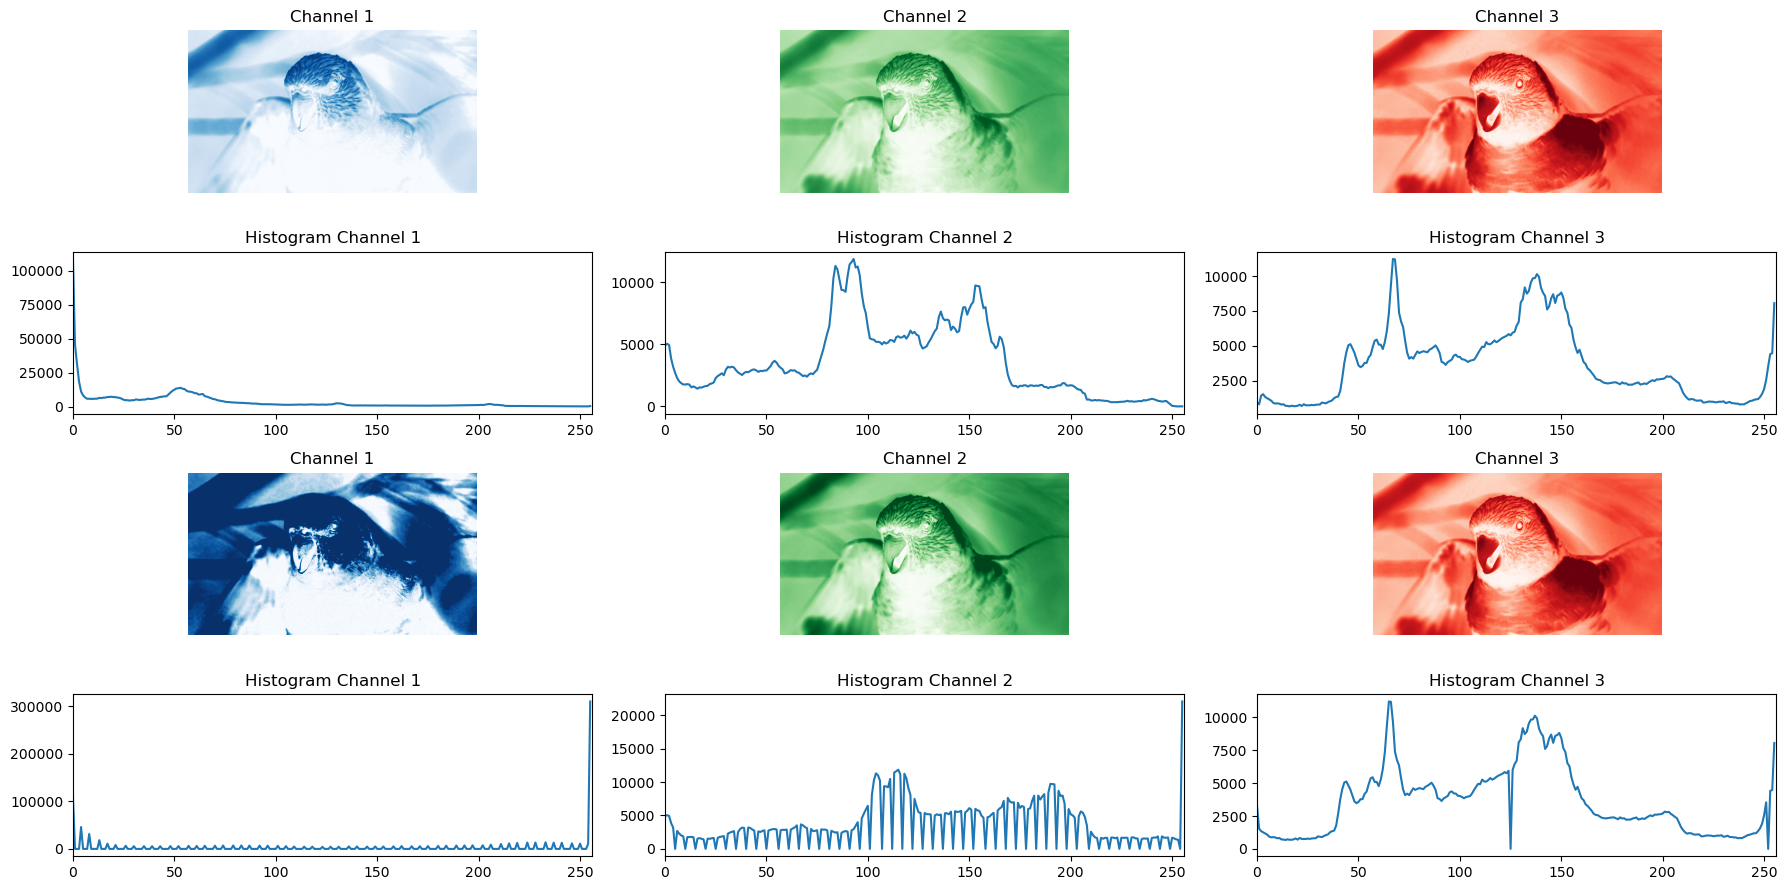

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 9))

#loop on every channel
for i, (channel, col) in enumerate(zip(chans, colors)):
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    for first in range(hist.size):
        if hist[first] > threshold:
            break;

    for last in range(255,-1,-1):
        if hist[last] > threshold:
            break;
            
    scale = 255 / (last - first)
    offset = first
    
    ax = axes[0, i]
    ax.imshow(channel, cmap=col)
    ax.set_title(f'Channel {i + 1}')
    ax.axis('off')
    
    ax = axes[1, i]
    ax.plot(hist)
    ax.set_title(f'Histogram Channel {i+1}')
    ax.set_xlim([0, 256])
    
    channel[channel < first] = 0
    channel[channel > last] = 255
    channel[(channel >= first) & (channel <= last)] = channel[(channel >= first) & (channel <= last)] * scale - offset
    
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    
    ax = axes[2, i]
    ax.imshow(channel, cmap=col)
    ax.set_title(f'Channel {i + 1}')
    ax.axis('off')
    
    ax = axes[3, i]
    ax.plot(hist)
    ax.set_title(f'Histogram Channel {i+1}')
    ax.set_xlim([0, 256])
    
plt.tight_layout()
plt.show()
    

(-0.5, 1279.5, 719.5, -0.5)

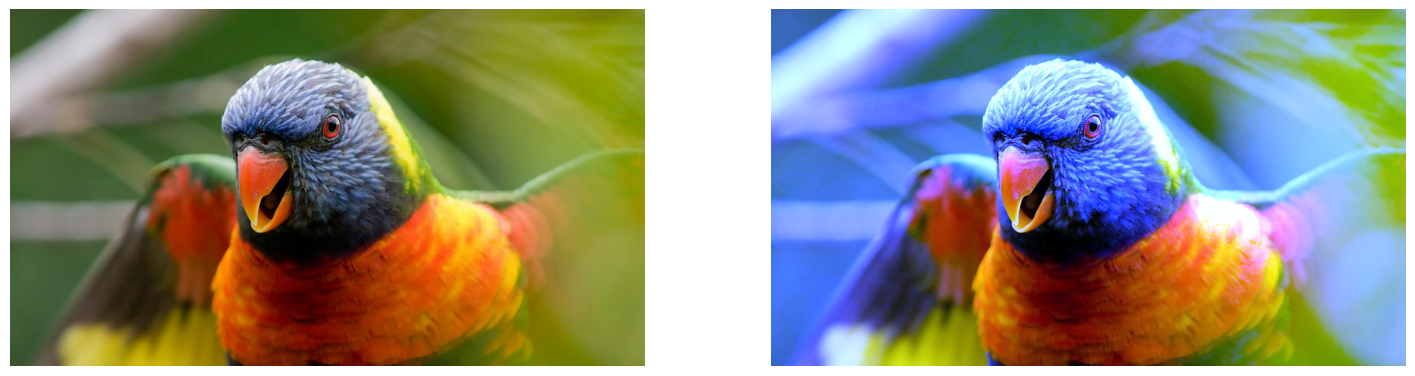

In [13]:
merged_image = cv.merge([chans[0], chans[1], chans[2]])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
ax = axes[0]
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

ax.axis('off')

ax = axes[1]
ax.imshow(cv.cvtColor(merged_image, cv.COLOR_BGR2RGB))

ax.axis('off')
